In [3]:
#!/usr/bin/python
########### Python 2.7 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64, re
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# major and minor plot seetings
majorLocator = MultipleLocator(200)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(50)

majoryLocator = MultipleLocator(10)
majoryFormatter = FormatStrFormatter('%d')
minoryLocator = MultipleLocator(2)

majorXLocator = MultipleLocator(24)
majorXFormatter = FormatStrFormatter('%d')
minorXLocator = MultipleLocator(6)

def history(a):
    
    body = a[2:-4]
    closeprice = []

    for key in body:
       if "Close" in key:
           c = key.split(':')
           close = float(re.findall('\d+\.\d+', c[1] )[0])
           closeprice.append(close) 

    return closeprice

def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.

    type is 'simple' | 'exponential'

    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a

def plotcoin(closeprice):

    # create Bitcoin plot
    ema50 = moving_average(closeprice, 2, type='exponential')
    fig, ax1 = plt.subplots()
    ax1.plot(closeprice[-10:] , 'g-')
    ax1.plot(ema50[-10:] , 'r-') 
    ax1.set_title('Bitcoin Price Etoro') 
    ax1.set_xlabel('Time (1 Hour)', color='k')
    ax1.set_ylabel('Close price (USD)', color='k')
    ax1.tick_params(colors='k')
    ax1.grid(color='k', linestyle='-', linewidth=0.5)
    ax1.yaxis.set_major_locator(majorLocator)
    ax1.yaxis.set_major_formatter(majorFormatter)
    ax1.yaxis.set_minor_locator(minorLocator)
    ax1.xaxis.set_major_locator(majorXLocator)
    ax1.xaxis.set_major_formatter(majorXFormatter)
    ax1.xaxis.set_minor_locator(minorXLocator)
    plt.savefig('bitcoin.png')   # save the figure to file
    plt.close(fig)    # close the figure


conn = http.client.HTTPSConnection('candle.etoro.com')
# 480 is 480 periods of 1 hour, 100000 is Bitcoin
conn.request("GET", "/candles/asc.json/OneMinute/1001/100000")
response = conn.getresponse()
data = response.read()
#print(type(data))
data=data.decode("utf-8")
a = data.split(',')
closeprice = history(a)
print(closeprice)
print(len(closeprice))
conn.close()
#plotcoin(closeprice)


[55009.88, 55020.21, 55097.3, 55222.94, 55129.54, 55113.21, 55088.59, 55150.18, 55278.71, 55256.97, 55188.28, 55245.31, 55086.28, 55004.64, 54939.85, 54898.14, 54798.55, 54646.43, 54749.05, 54737.81, 54751.45, 54631.11, 54623.5, 54788.15, 54661.78, 54717.86, 54522.08, 54619.42, 54493.2, 54426.58, 54394.66, 54316.47, 54276.83, 54257.37, 54427.13, 54632.61, 54387.5, 54317.95, 54497.18, 54529.58, 54576.65, 54613.1, 54697.49, 54647.99, 54550.72, 54593.59, 54462.59, 54498.86, 54373.81, 54471.63, 54332.45, 54283.01, 54488.79, 54540.12, 54671.33, 54633.54, 54738.79, 54728.42, 54697.65, 54692.86, 54670.38, 54636.3, 54897.35, 54940.47, 54826.79, 54822.83, 54864.42, 54903.67, 54962.44, 54991.98, 54934.34, 54856.24, 54803.26, 54831.53, 54920.07, 54854.91, 54871.4, 54823.89, 54894.65, 54901.81, 54844.06, 54899.81, 54834.46, 54688.23, 54617.28, 54566.95, 54664.8, 54661.1, 54646.8, 54794.97, 54784.1, 54600.45, 54593.53, 54738.24, 54613.95, 54596.13, 54628.2, 54508.78, 54542.82, 54623.61, 54477.75, 5

In [30]:
mezzo=int((len(closeprice)-1)/2)
x0=closeprice[mezzo]
momenti=10
mom_val=[]
for m in range(1,momenti+1):
    temp=[]
    for i in range(1,mezzo+1):
        temp.append((closeprice[mezzo+1]-closeprice[mezzo-i])**m)
    mom_val.append(temp)

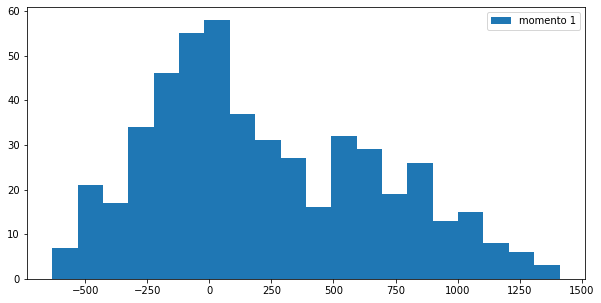

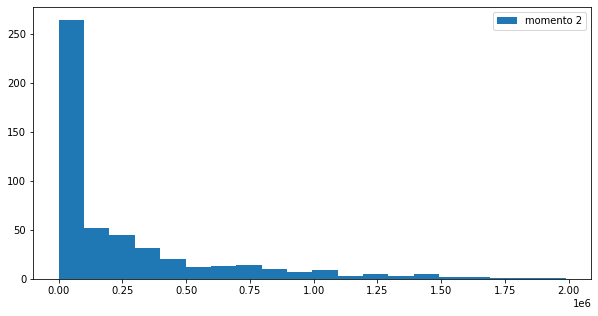

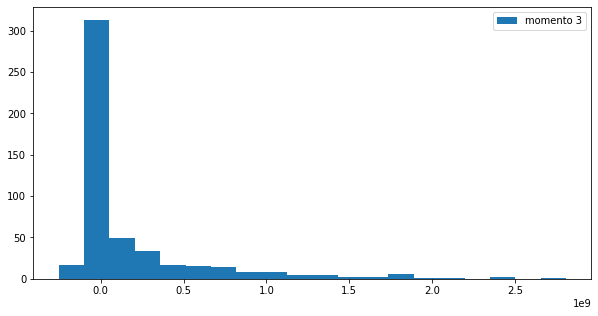

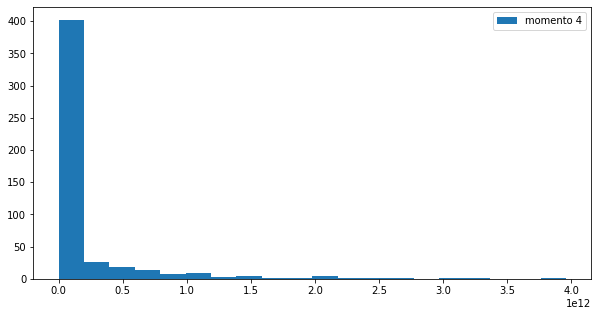

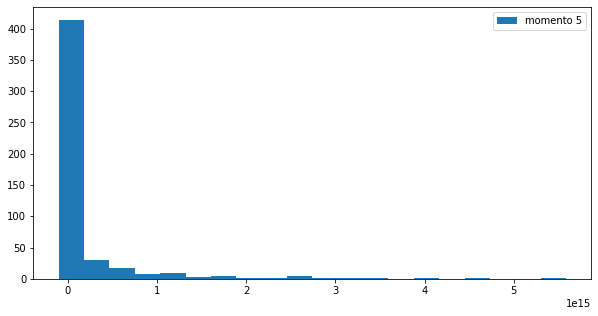

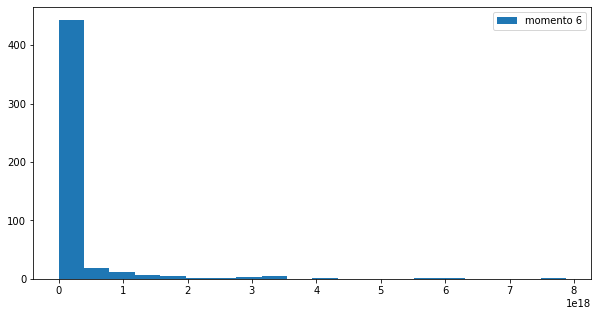

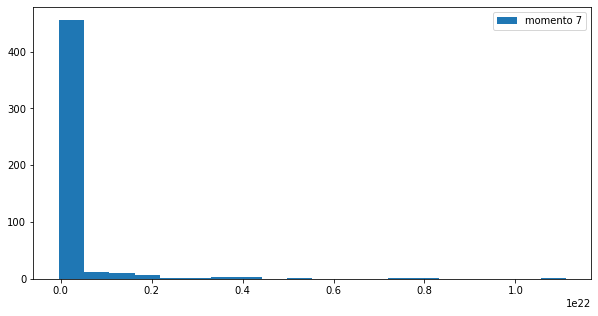

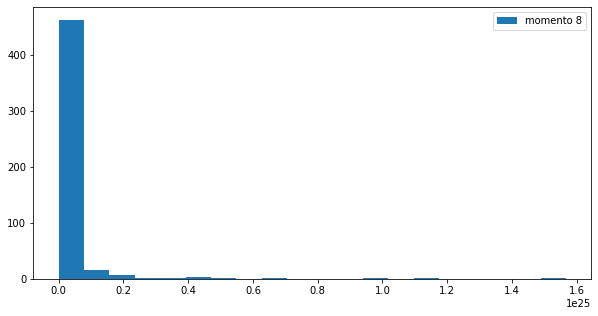

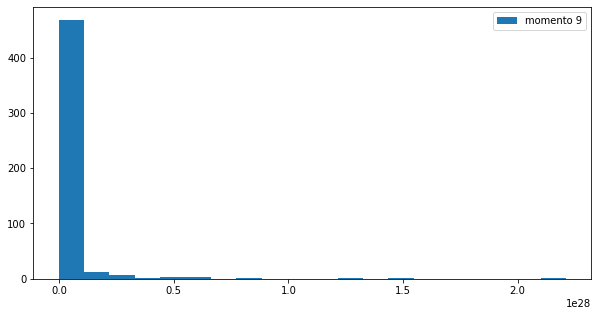

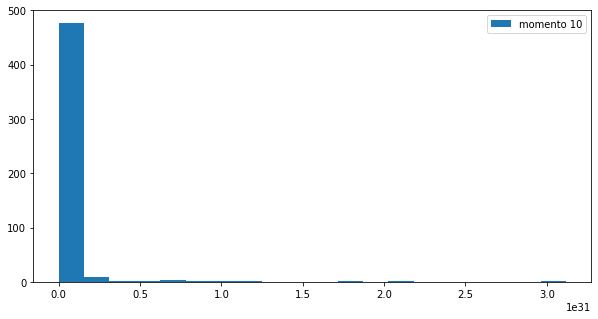

In [38]:
import matplotlib.pyplot as plt
bins=20
for momento in range(1,momenti+1):
    plt.figure(figsize=(10,5))
    plt.hist(mom_val[momento-1],bins,density=False, histtype='bar', label='momento '+str(momento))
    plt.legend()

In [68]:
inte=10
num=int(len(closeprice)/inte)
mat=[]
for i in range(0,9):
    mat.append(closeprice[i*100:(i+1)*100+1])
    
print(len(mat))

9


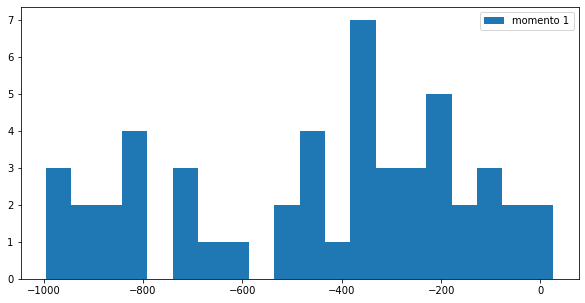

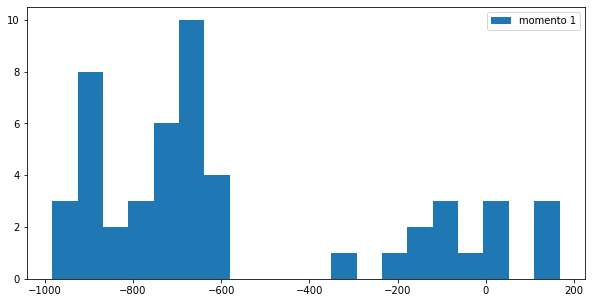

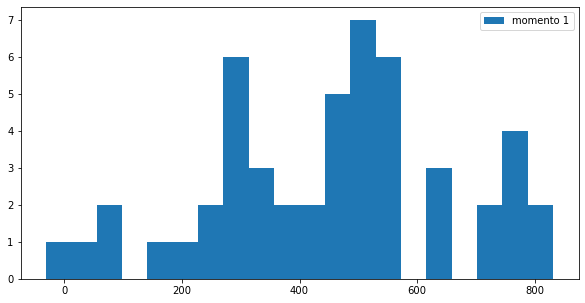

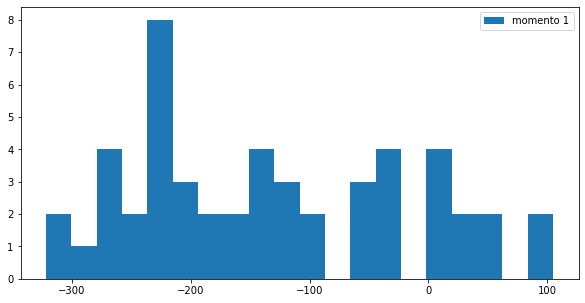

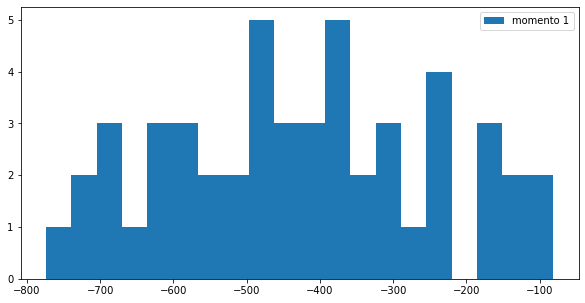

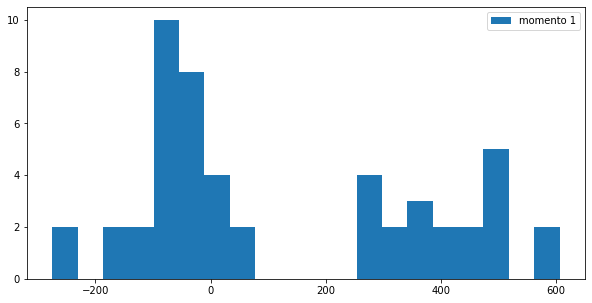

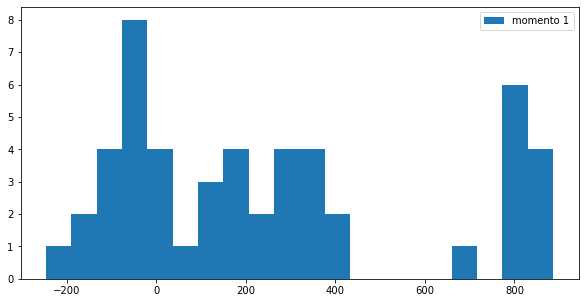

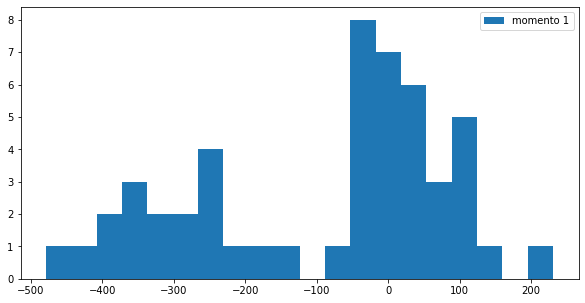

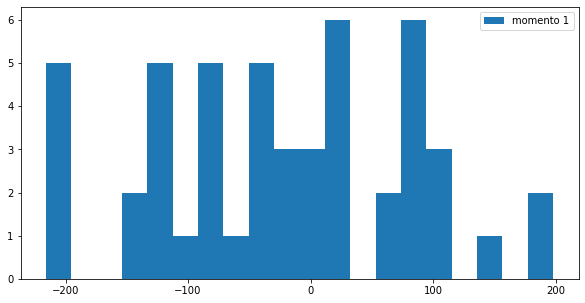

In [65]:
for i in range(0,num): 
    a1=mat[i]
    mezzo=int((len(a1)-1)/2)
    x0=a1[mezzo]
    momenti=10
    mom_val=[]
    for m in range(1,momenti+1):
        temp=[]
        for i in range(1,mezzo+1):
            temp.append((a1[mezzo+1]-a1[mezzo-i])**m)
        mom_val.append(temp)
    momento=1
    plt.figure(figsize=(10,5))
    plt.hist(mom_val[momento-1],bins,density=False, histtype='bar', label='momento '+str(momento))
    plt.legend()

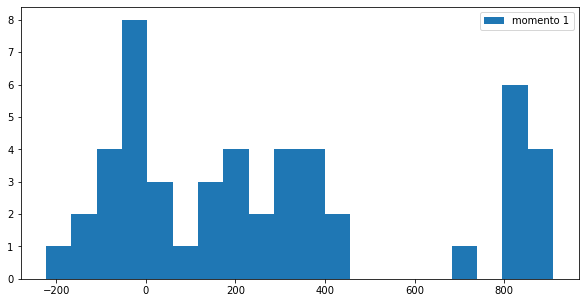

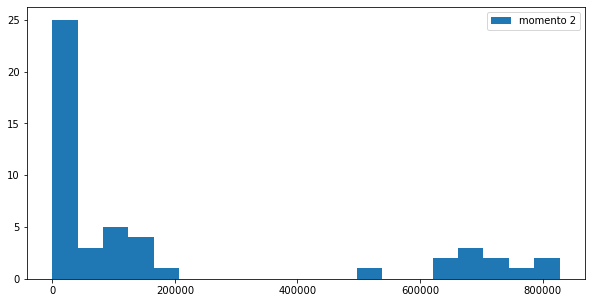

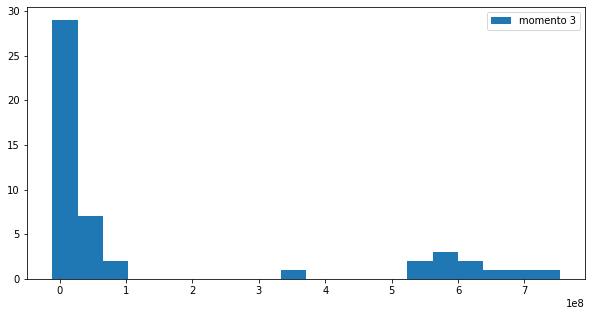

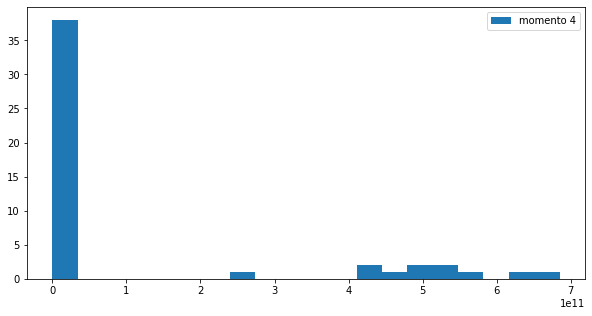

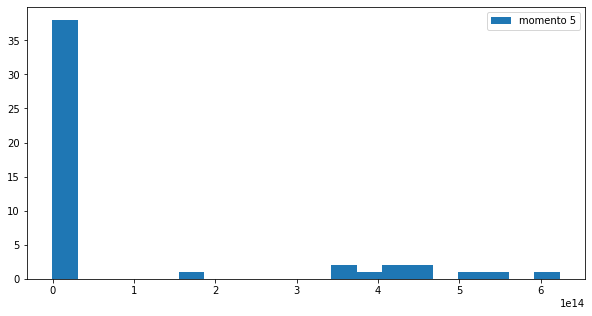

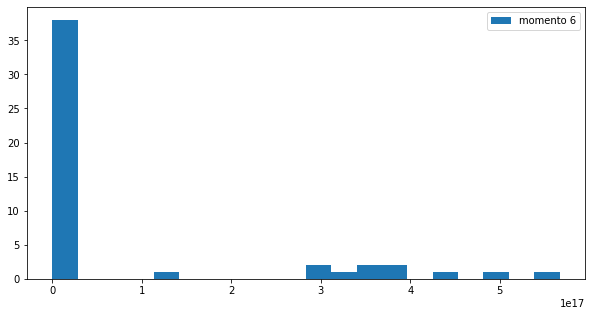

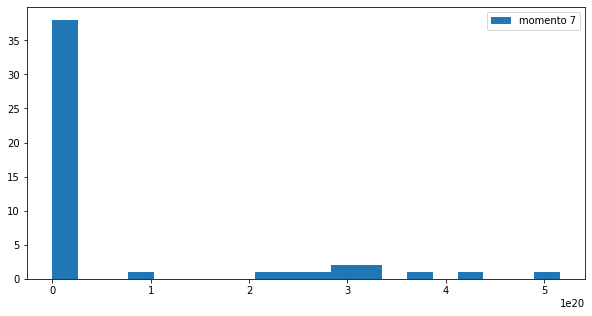

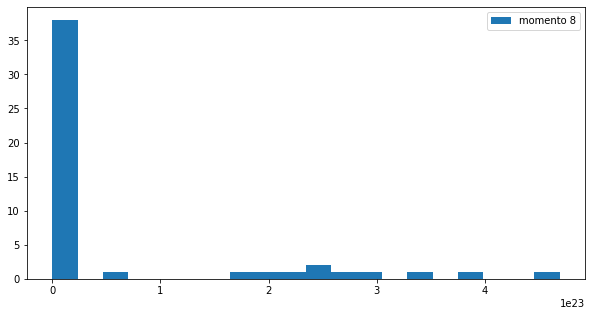

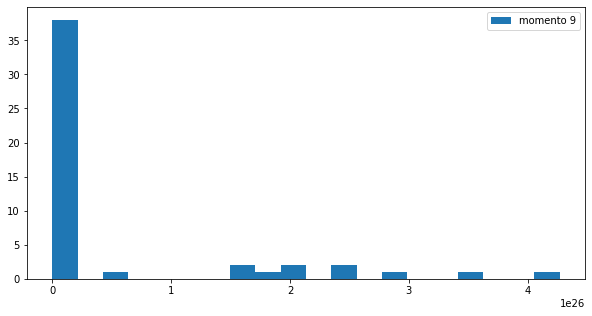

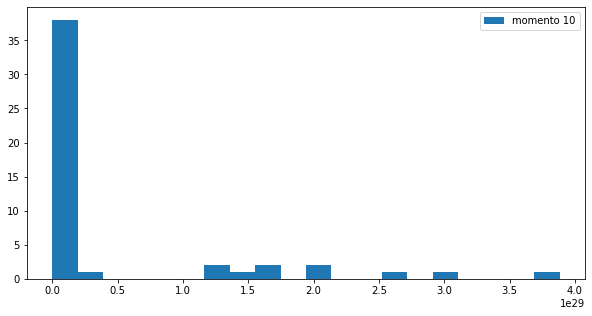

In [56]:
import matplotlib.pyplot as plt
bins=20
for momento in range(1,momenti+1):
    plt.figure(figsize=(10,5))
    plt.hist(mom_val[momento-1],bins,density=False, histtype='bar', label='momento '+str(momento))
    plt.legend()

In [74]:
import numpy as np
inte=10
num_int=int(len(closeprice)/inte)
mat=[]
for i in range(0,num_int):
    mat.append(closeprice[i*inte:(i+1)*inte+1])
    
#print(mat)

In [79]:
media_k=[]
for j in range(0,num_int):
    mezzo=int((len(mat[j])-1)/2)
    x0=mat[j][mezzo]
    temp=[]
    for i in range(1,mezzo+1):
        temp.append((mat[j][mezzo+1]-mat[j][mezzo-i]))
    media_k.append(np.mean(temp))

100


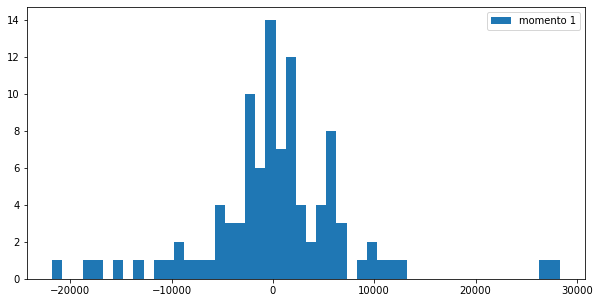

In [84]:
print(len(media_k))
nuova=[]
for i in range(len(media_k)):
    nuova.append(media_k[i]*(i+1))
bins=50
plt.figure(figsize=(10,5))
plt.hist(nuova,bins,density=False, histtype='bar', label='momento '+str(momento))
plt.legend()

100


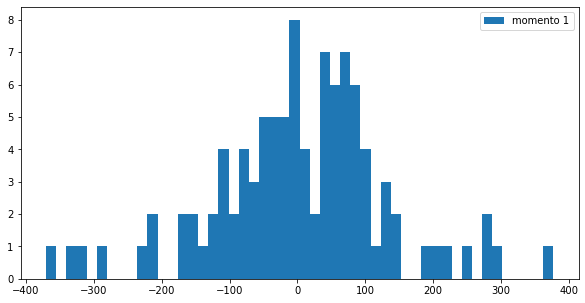

In [85]:
print(len(media_k))
bins=50
plt.figure(figsize=(10,5))
plt.hist(media_k,bins,density=False, histtype='bar', label='momento '+str(momento))
plt.legend()